In [1]:
# Importing libraries and packages:

import os
import sys
import numpy as np
import pandas as pd     #need version 1.4.0 ! 
from pandas import json_normalize 
sys.path.append(os.getcwd())
from pathlib import Path  
import matplotlib.pyplot as pltpip 
from joblib import dump, load
# import dask.dataframe as dd
from tqdm import tqdm
from matplotlib import pyplot as plt
import random
from matplotlib.ticker import MultipleLocator


In [2]:
# TEST WITH MORE DATA 

# Load CVEs from the following years
CVE_YEARS = ['2005', '2006','2007', '2008', '2009', '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2022','2023']

cve_all_raw = pd.DataFrame()

for cveyear in CVE_YEARS:
  CVE_FEED = 'nvdcve-1.1-' + cveyear + '.json'
# Without the zip files you can retrieve data from api:
  # CVE_URL = 'https://nvd.nist.gov/feeds/json/cve/1.1/' + CVE_FEED + '.zip'
  # !wget -qq $CVE_URL
  # !unzip $CVE_FEED
  cvejson = pd.read_json(CVE_FEED)
  cve_all_raw = cve_all_raw.append(pd.json_normalize(cvejson['CVE_Items']))
  
cve_all = cve_all_raw
print('Loaded ', len(cve_all_raw), ' CVEs')

/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_939/2921069625.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cve_all_raw = cve_all_raw.append(pd.json_normalize(cvejson['CVE_Items']))
/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_939/2921069625.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cve_all_raw = cve_all_raw.append(pd.json_normalize(cvejson['CVE_Items']))
/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_939/2921069625.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cve_all_raw = cve_all_raw.append(pd.json_normalize(cvejson['CVE_Items']))
/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_939/2921069625.py:15: FutureWarning: The frame.append method is depreca

Loaded  234102  CVEs


In [3]:
# Get vendor and product name and put in last columns:

cve_all['description']=cve_all.apply(lambda row: row['cve.description.description_data'][0]['value'], axis=1)

def get_vendor(row):
  if len(row['configurations.nodes']) > 0:
    if len(row['configurations.nodes'][0].get('cpe_match')) > 0:
      return pd.Series(row['configurations.nodes'][0].get('cpe_match')[0]['cpe23Uri'].split(":")[3:5])
    else:
      return pd.Series(row['configurations.nodes'][0].get('children')[0].get('cpe_match')[0]['cpe23Uri'].split(":")[3:5])
  else:
    return pd.Series(['unknown', 'unknown'])


cve_all[['vendor', 'product']]=cve_all.apply(lambda row: get_vendor(row), axis=1)
cve_all.head()

,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ID,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,...,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,impact.baseMetricV2.acInsufInfo,description,vendor,product
0,2005-05-02T04:00Z,2017-10-11T01:29Z,CVE,MITRE,4.0,CVE-2005-0001,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://lists.grok.org.uk/pipermail/f...,"[{'lang': 'en', 'value': 'Race condition in th...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Race condition in the page fault handler (faul...,linux,linux_kernel
1,2005-05-02T04:00Z,2008-09-10T19:34Z,CVE,MITRE,4.0,CVE-2005-0002,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://security.gentoo.org/glsa/glsa...,"[{'lang': 'en', 'value': 'poppassd_pam 1.0 and...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"poppassd_pam 1.0 and earlier, when changing a ...",gentoo,poppassd_pam
2,2005-04-14T04:00Z,2017-10-11T01:29Z,CVE,MITRE,4.0,CVE-2005-0003,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://www.redhat.com/support/errata...,"[{'lang': 'en', 'value': 'The 64 bit ELF suppo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The 64 bit ELF support in Linux kernel 2.6 bef...,linux,linux_kernel
3,2005-04-14T04:00Z,2022-08-05T14:26Z,CVE,MITRE,4.0,CVE-2005-0004,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://www.debian.org/security/2005/...,"[{'lang': 'en', 'value': 'The mysqlaccess scri...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The mysqlaccess script in MySQL 4.0.23 and ear...,oracle,mysql
4,2005-05-02T04:00Z,2017-10-11T01:29Z,CVE,MITRE,4.0,CVE-2005-0005,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://www.idefense.com/application/...,"[{'lang': 'en', 'value': 'Heap-based buffer ov...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heap-based buffer overflow in psd.c for ImageM...,imagemagick,imagemagick


In [4]:
# Remove unknowns and reset the index:

cve_all_r = cve_all[cve_all['vendor']!='unknown'] 

cve_all_r.reset_index(drop=True, inplace=True)

cve_all_r[['vendor','product']].value_counts()  

vendor                       product                   
google                       android                       7407
                             chrome                        3254
linux                        linux_kernel                  3223
apple                        mac_os_x                      2301
microsoft                    windows_server_2008           1807
                                                           ... 
netapp                       santricity_storage_manager       1
easy_banners_plugin_project  easy_banners                     1
netapp                       oncommand_cloud_manager          1
easy_captcha_project         easy_captcha                     1
lingx                        downloadcenter                   1
Length: 49989, dtype: int64

In [5]:
# Count amount of CVE's in products:
cve_all_r_test_info_products = cve_all_r[['vendor','product']].value_counts() 

info_products_2015_2022 = cve_all_r_test_info_products.value_counts()


# Count amount of occurences of every CVE
cve_all_r_test_info_items = cve_all_r[['cve.CVE_data_meta.ID']].value_counts() 

info_items_2015_2022 = cve_all_r_test_info_items.value_counts()

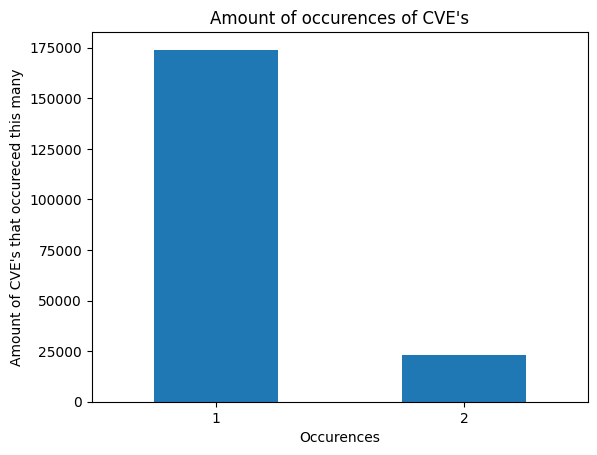

In [6]:
# Create a plot for the occurences of the CVE's 
# As can be concluded from this plot: CVE's only occur twice or once. This could cause a cold-start item problem.... 
# We cannot filter these CVE's, maybe only the CVE's that occur only once.

info_items_2015_2022.plot.bar()

# Set the title and labels
plt.title("Amount of occurences of CVE's")
plt.xlabel("Occurences")
plt.ylabel("Amount of CVE's that occureced this many")

plt.xticks(rotation=0)

plt.show()
# plt.savefig('2015-2022itemss.jpg', bbox_inches="tight")


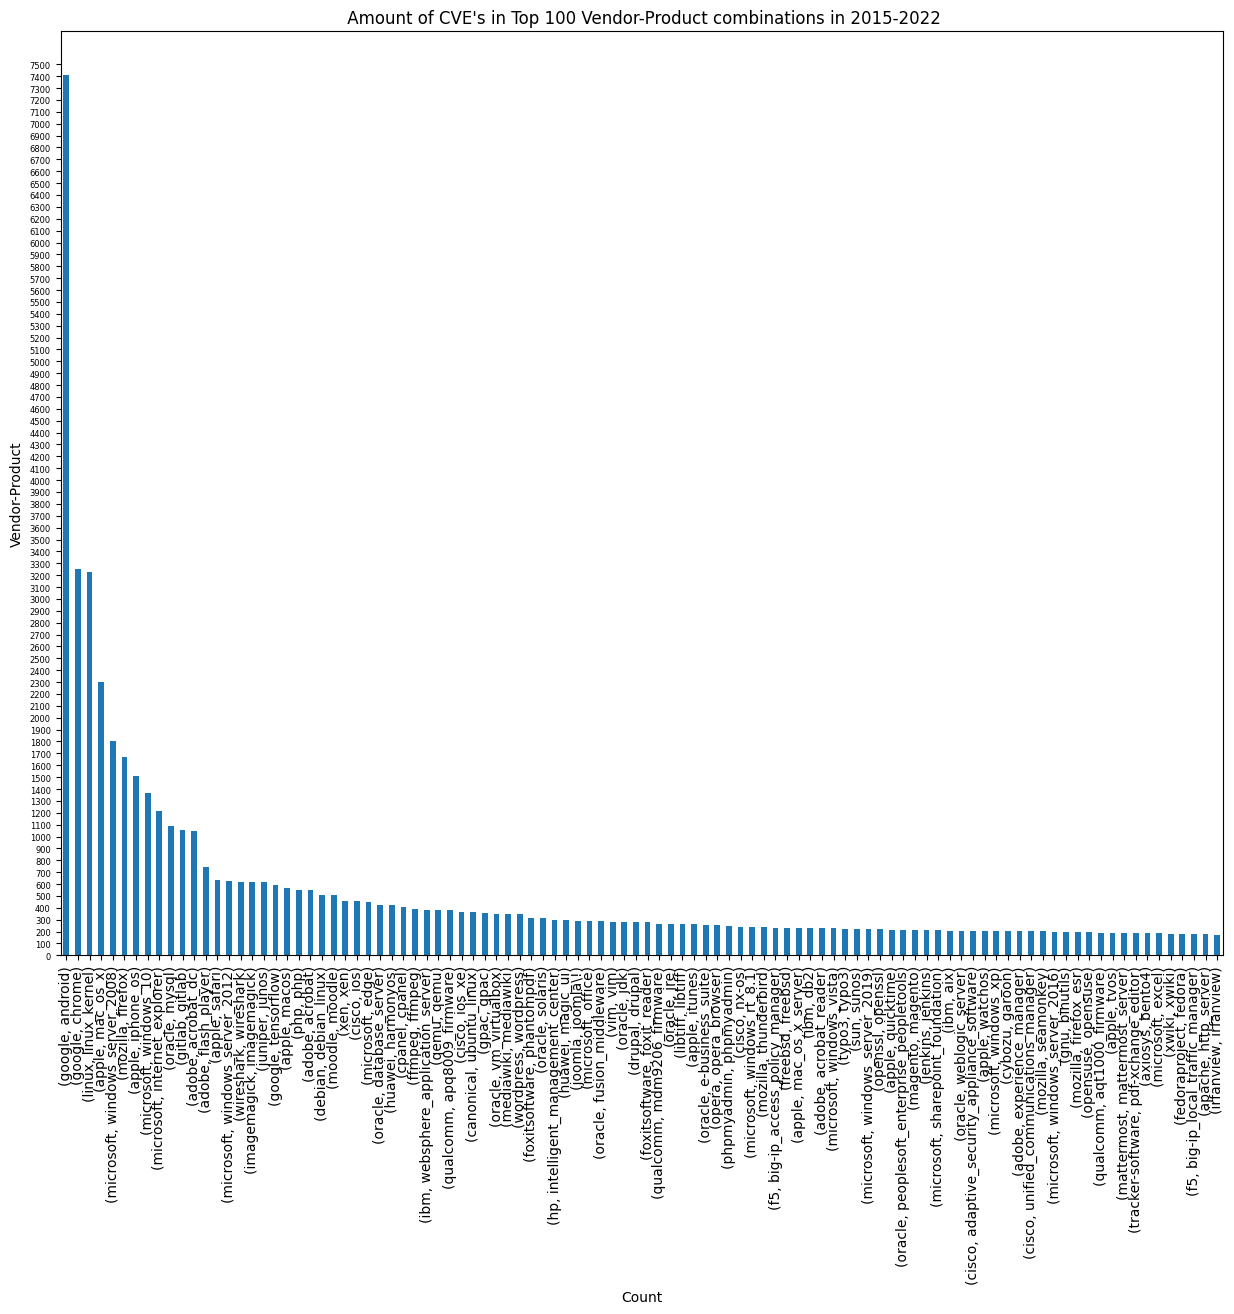

In [7]:
# Create a plot for the amount of CVE's in the top 100 products 

top_n = 100
top_values = cve_all_r_test_info_products.head(top_n)

# Create a bar ploot
fig, ax = plt.subplots(figsize=(15, 12)) 
top_values.plot(kind='bar', ax=ax)

# Set the title and labels
plt.title(f" Amount of CVE's in Top {top_n} Vendor-Product combinations in 2015-2022")
plt.xlabel("Count")
plt.ylabel("Vendor-Product")
plt.yticks(fontsize=6)  

# Set the y-axis tick locations
yticks = np.arange(0, top_values.max() + 100, 100)
plt.yticks(yticks)


plt.show()
# plt.savefig('2015-2022cveproducts.jpg', bbox_inches="tight")



In [8]:
# Select vendor-product pairs that occur less often than 20 times and delete these from the data

selected_pairs = cve_all_r_test_info_products[cve_all_r_test_info_products > 20]

mask = cve_all_r[['vendor', 'product']].apply(tuple, axis=1).isin(selected_pairs.index)

cve_all_r_filtered = cve_all_r[mask]

print(int(((len(cve_all_r)- len(cve_all_r_filtered) ) / len(cve_all_r)) * 100),"%", "of the data is pruned " )


51 % of the data is pruned 


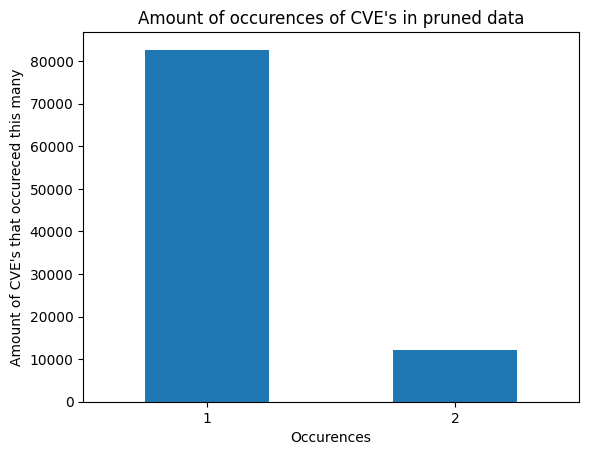

In [9]:
# Count amount of occurences of every CVE -> In pruned data 

cve_all_r_filteredinfo_items = cve_all_r_filtered[['cve.CVE_data_meta.ID']].value_counts() 

info_items_2015_2022_filtered = cve_all_r_filteredinfo_items.value_counts()

info_items_2015_2022_filtered.plot.bar()

# Set the title and labels
plt.title("Amount of occurences of CVE's in pruned data")
plt.xlabel("Occurences")
plt.ylabel("Amount of CVE's that occureced this many")

plt.xticks(rotation=0)

plt.show()
# plt.savefig('2015-2022itemss.jpg', bbox_inches="tight")

In [10]:
# extract the cwe from the description of the CVE

cwe_all = cve_all
values = []
for data in cwe_all['cve.problemtype.problemtype_data']:
    try:
        value = data[0]['description'][0]['value']
        values.append(value)
    except (IndexError, KeyError):
        values.append(None)

# print(values)
cwe_all['cwe'] = values

In [11]:
# Remove unknowns and reset the index:

cwe_all = cwe_all[cwe_all['vendor']!='unknown'] 

cwe_all.reset_index(drop=True, inplace=True)

# cve_all_r[['vendor','product']].value_counts()  

In [12]:
amount_of_products = cwe_all[['product']].nunique() 
amount_of_cwe = cwe_all[['cwe']].nunique()
# print(len(cwe_all) * 100) / (amount_of_products * amount_of_cwe)
density = (float(len(cwe_all) * 100)) / (float(amount_of_products) * float(amount_of_cwe))

print("Total amount of unique products:",amount_of_products)
print("Total amount of unique cwe's:",amount_of_cwe)
print("Densit of the data is:", density)

Total amount of unique products: product    46186
dtype: int64
Total amount of unique cwe's: cwe    377
dtype: int64
Densit of the data is: 1.2652909277800832


In [13]:
# Count amount of unique CWE's per software product

cwe_all_r_test_info_items = cwe_all.groupby('product')['cwe'].nunique()
cwe_all_r_test_info_items = cwe_all_r_test_info_items.sort_values(ascending=False)

occurences_amount_items = cwe_all_r_test_info_items.value_counts()

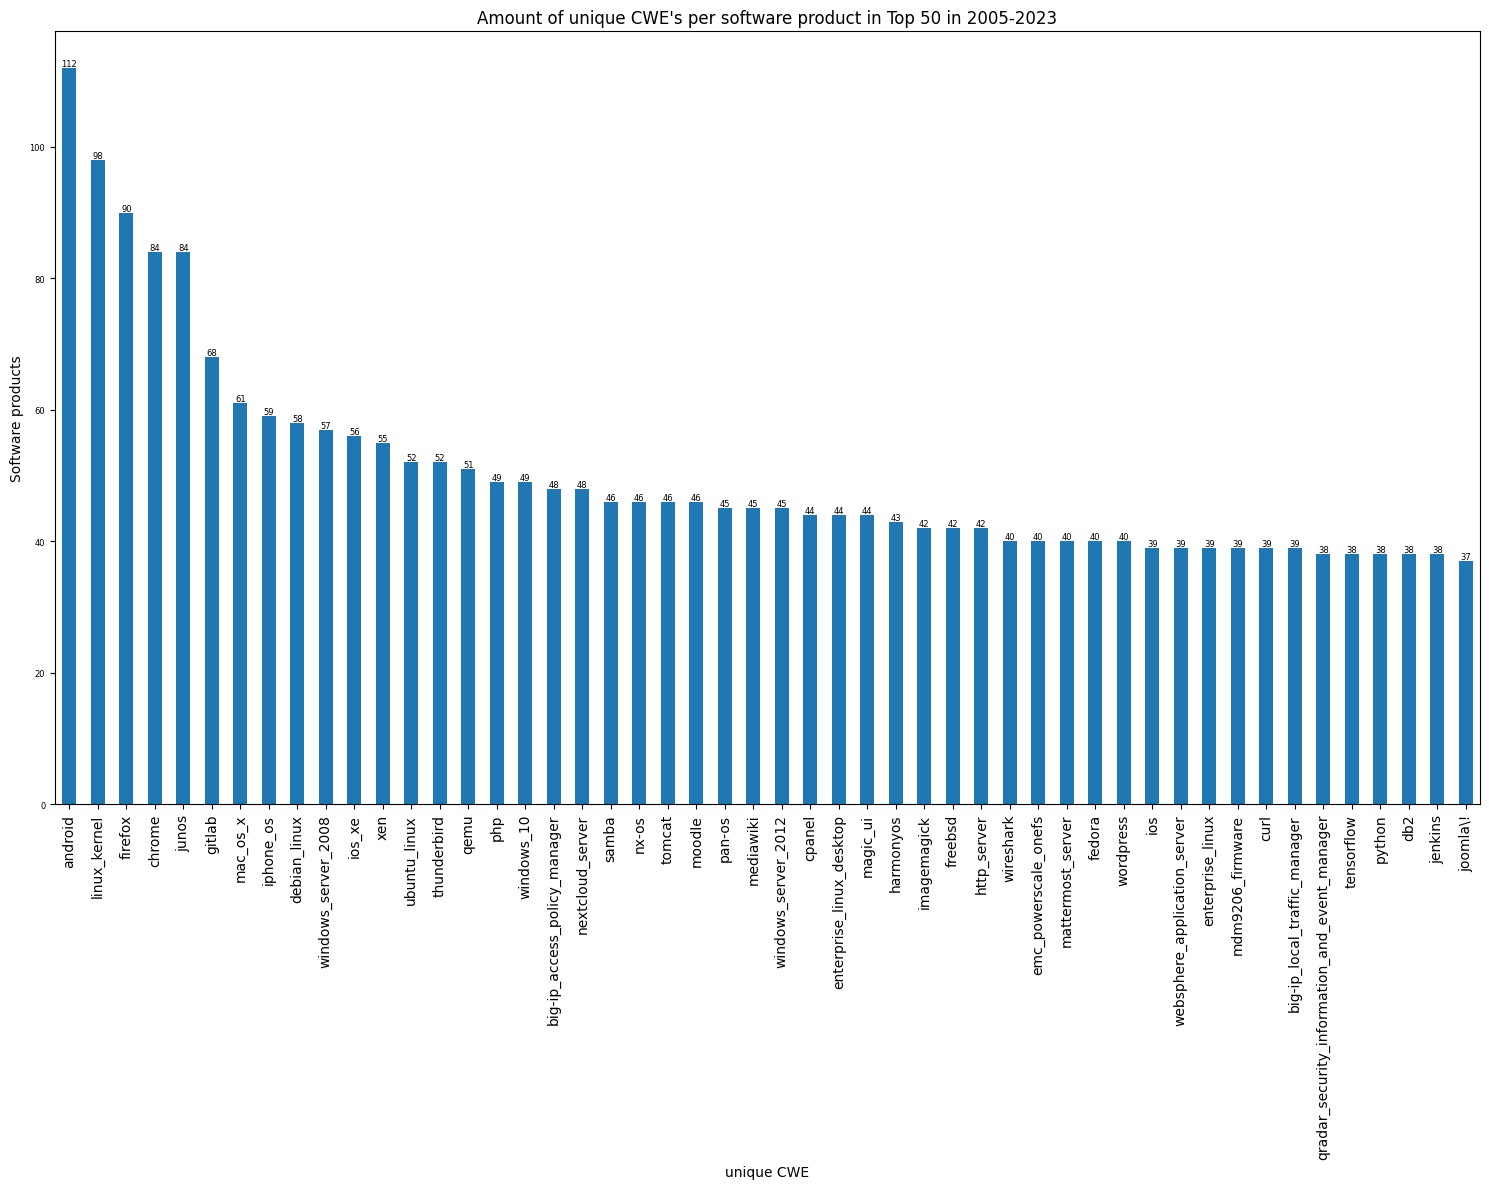

In [14]:
# How many items does each user have / How many CWE's does each software product have

top_n = 50
top_values = cwe_all_r_test_info_items.head(top_n)

fig, ax = plt.subplots(figsize=(15, 12))
ax = top_values.plot(kind='bar', ax=ax)

plt.title(f"Amount of unique CWE's per software product in Top {top_n} in 2005-2023")
plt.xlabel("unique CWE")
plt.ylabel("Software products")
plt.yticks(fontsize=6)

for index, value in enumerate(top_values):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=6)

plt.tight_layout() 
plt.show()

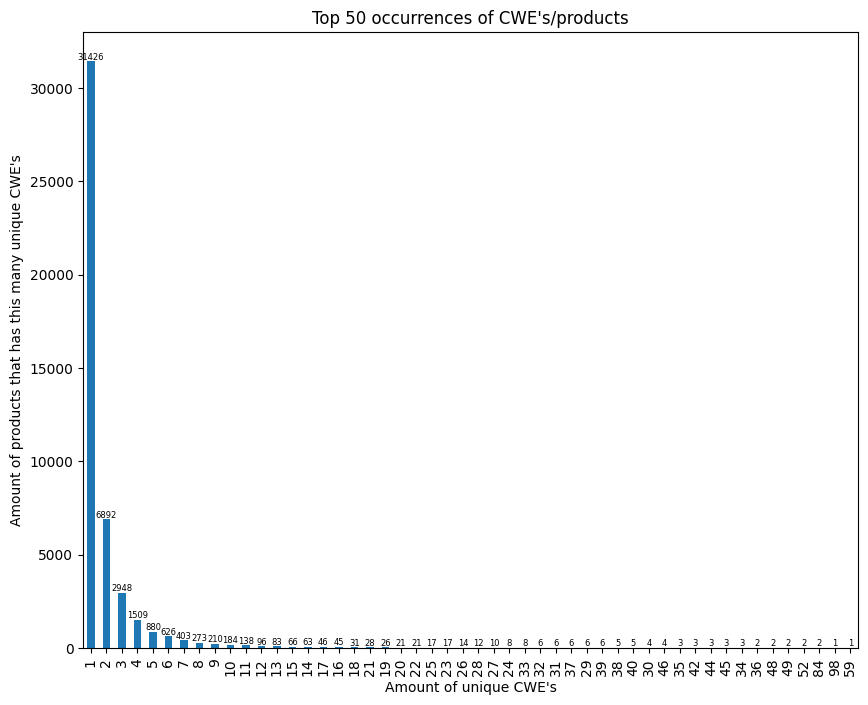

In [15]:
# On the y-axis how many times this amount of unique CWE's occured and on the x-axis the amount of unqiue CWE's

occurences_amount_items2 = occurences_amount_items.head(50)

fig, ax2 = plt.subplots(figsize=(10, 8))
occurences_amount_items2.plot.bar(ax=ax2)

plt.title("Top 50 occurrences of CWE's/products")
plt.xlabel("Amount of unique CWE's")
plt.ylabel("Amount of products that has this many unique CWE's")

for index, value in enumerate(occurences_amount_items2):
    ax2.text(index, value, str(value), ha='center', va='bottom', fontsize=6)

In [16]:
# How many products do have more than 6 unique CWE?

cwe_count_more_than_6_items = (cwe_all_r_test_info_items > 6).sum()

print("Number of CWE's with more than 6 unique products:", cwe_count_more_than_6_items)


Number of CWE's with more than 6 unique products: 1905


In [17]:
# How many products have more than 6 unique CWE's in % of total?


percentage_more_6 = (cwe_count_more_than_6_items  / amount_of_products) * 100

print( int(percentage_more_6), "%","of the products have more than 6 unique CWE's ")

4 % of the products have more than 6 unique CWE's 


In [18]:
# How many products do have more than 4 unique CWE?

cwe_count_more_than_4_items = (cwe_all_r_test_info_items > 4).sum()

print("Number of CWE's with more than 4 unique products:", cwe_count_more_than_4_items)


Number of CWE's with more than 4 unique products: 3411


In [19]:
# How many products have more than 4 unique CWE's in % of total?
percentage_more_4 = (cwe_count_more_than_4_items  / amount_of_products) * 100

print( int(percentage_more_4), "%","of the products have more than 4 unique CWE's ")

7 % of the products have more than 4 unique CWE's 


In [20]:
# Count occurences of CWE's in the dataset CVE_all (how many CVE's have this CWE)
cwe_all_r_test_info_products = cwe_all[['cwe']].value_counts() 

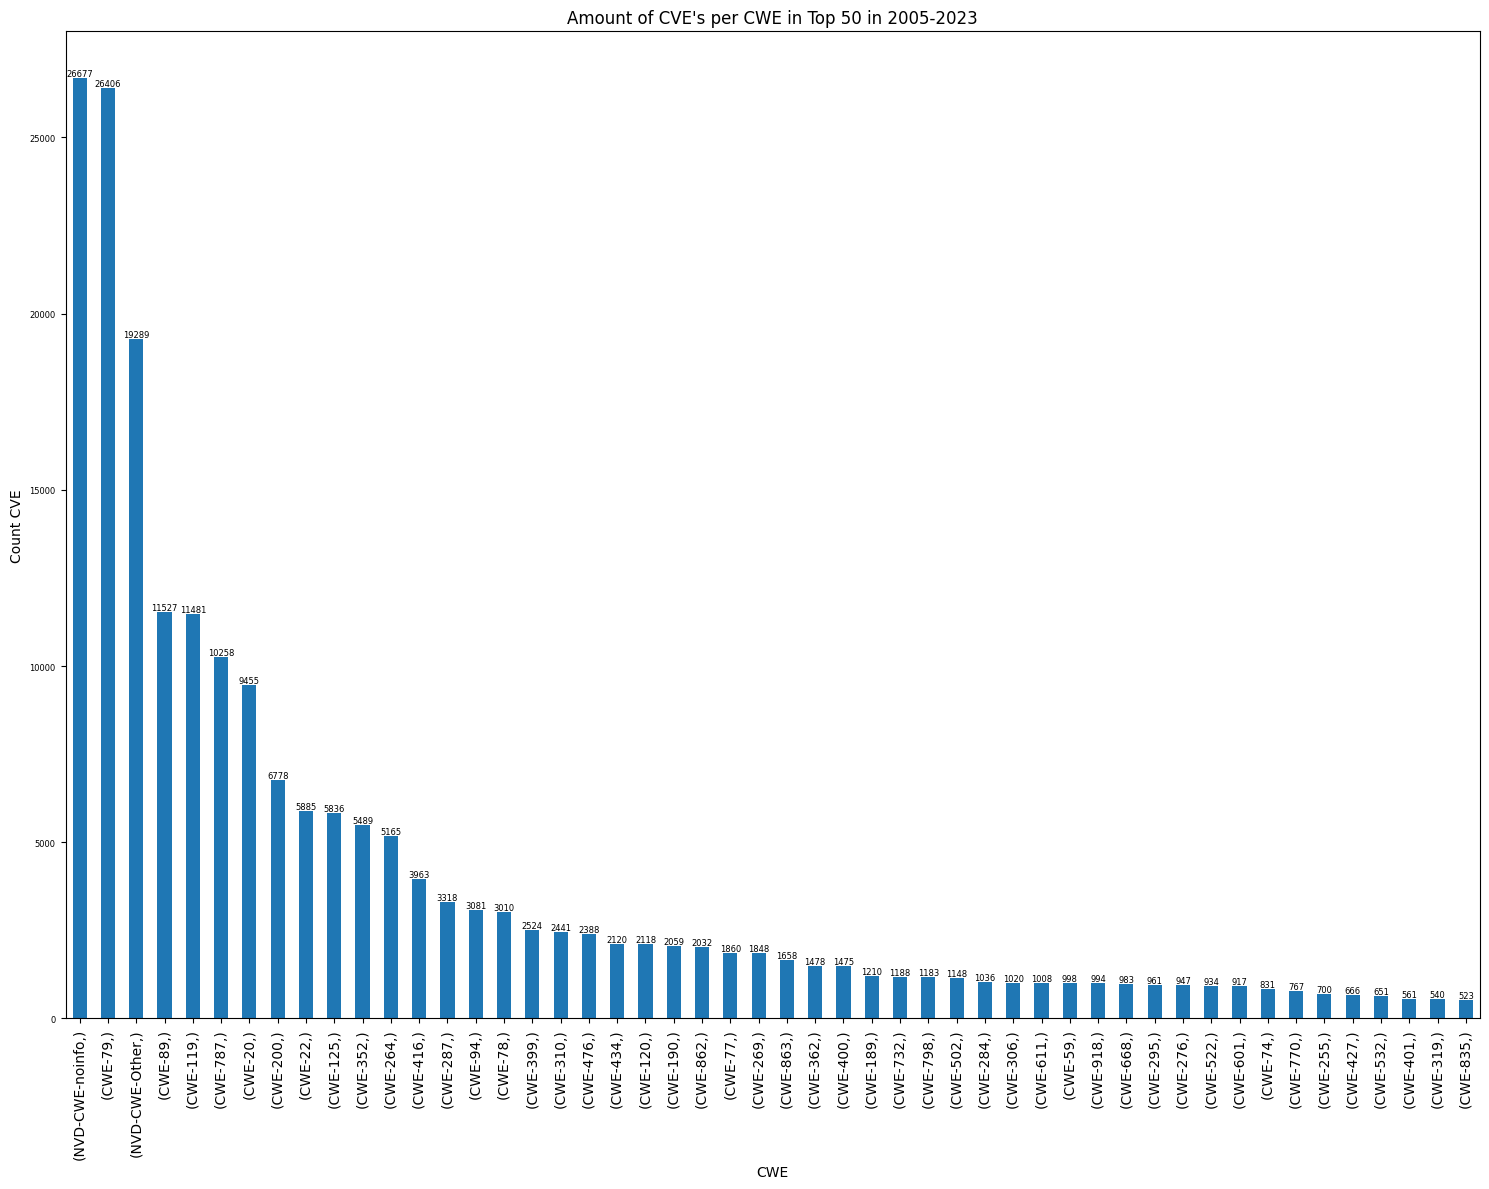

In [21]:
# A plot for the amount of CVE's per CWE

top_n = 50
top_values = cwe_all_r_test_info_products.head(top_n)

fig, ax = plt.subplots(figsize=(15, 12))
ax = top_values.plot(kind='bar', ax=ax)

plt.title(f"Amount of CVE's per CWE in Top {top_n} in 2005-2023")
plt.xlabel("CWE")
plt.ylabel("Count CVE")
plt.yticks(fontsize=6)

for index, value in enumerate(top_values):
    ax.text(index, value, str(value), ha='center', va='bottom', fontsize=6)

plt.tight_layout() 
plt.show()


In [22]:
# Count occurences of unique products in CWE's 

cwe_unique_products_count = cwe_all.groupby('cwe')['product'].nunique()
cwe_unique_products_count = cwe_unique_products_count.sort_values(ascending=False)

occurences_amount_products = cwe_unique_products_count.value_counts()


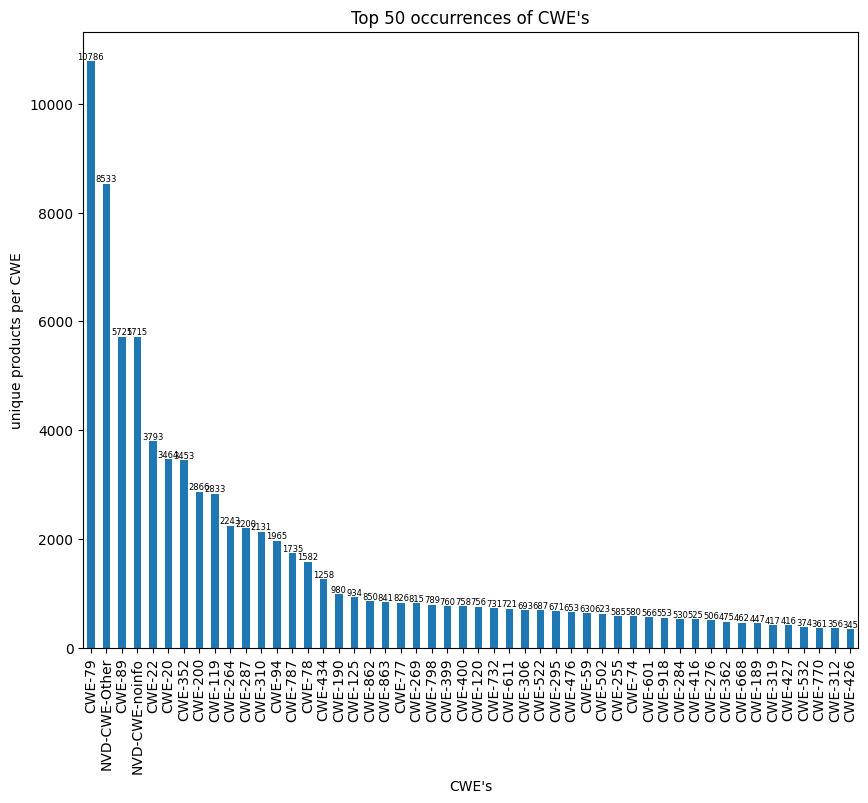

In [23]:
# Count the amount of unique products per CWE

cwe_unique_products_count3 = cwe_unique_products_count.head(50)

fig, ax2 = plt.subplots(figsize=(10, 8))
cwe_unique_products_count3.plot.bar(ax=ax2)

plt.title("Top 50 occurrences of CWE's")
plt.xlabel("CWE's")
plt.ylabel("unique products per CWE")

for index, value in enumerate(cwe_unique_products_count3):
    ax2.text(index, value, str(value), ha='center', va='bottom', fontsize=6)


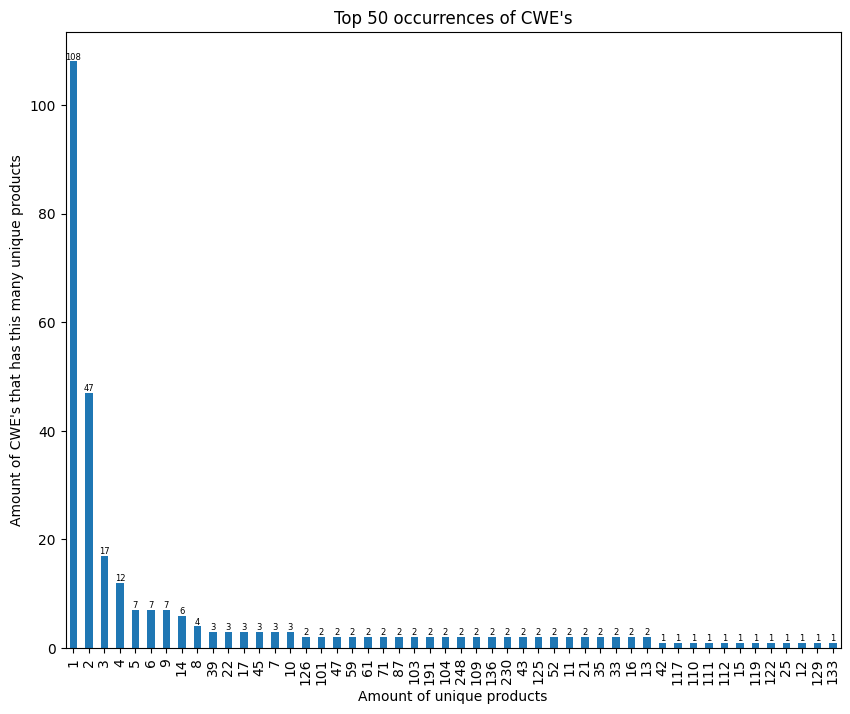

In [24]:
# On the y-axis the amount of CWE's that have x many unique products and x-axis x (the amount of unique products).

cwe_unique_products_count2 = occurences_amount_products.head(50)

fig, ax2 = plt.subplots(figsize=(10, 8))
cwe_unique_products_count2.plot.bar(ax=ax2)

plt.title("Top 50 occurrences of CWE's")
plt.xlabel("Amount of unique products")
plt.ylabel("Amount of CWE's that has this many unique products")

for index, value in enumerate(cwe_unique_products_count2):
    ax2.text(index, value, str(value), ha='center', va='bottom', fontsize=6)


In [25]:
# How many CWE's do have more than 6 unique products?

cwe_count_more_than_6_products = (cwe_unique_products_count > 6).sum()

print("Number of CWE's with more than 6 unique products:", cwe_count_more_than_6_products)


Number of CWE's with more than 6 unique products: 179


In [26]:
# How many CWE's do have more than 4 unique products?

cwe_count_more_than_4_products = (cwe_unique_products_count > 4).sum()

print("Number of CWE's with more than 4 unique products:", cwe_count_more_than_4_products)


Number of CWE's with more than 4 unique products: 193


In [27]:
# How many CWE's do have more than 2 unique products?

cwe_count_more_than_2_products = (cwe_unique_products_count > 2).sum()

print("Number of CWE's with more than 2 unique products:", cwe_count_more_than_2_products)

Number of CWE's with more than 2 unique products: 222


In [28]:
cwe_count_2_products = (cwe_unique_products_count == 2).sum()

print("Number of CWE's with 2 unique products:", cwe_count_2_products)

Number of CWE's with 2 unique products: 47


In [29]:
cwe_count_1_products = (cwe_unique_products_count == 1).sum()

print("Number of CWE's with 1 unique product:", cwe_count_1_products)

Number of CWE's with 1 unique product: 108


In [30]:
# How many CWE's have more than 6 unique products in % of total?

percentage_more_6 = (cwe_count_more_than_6_products  / amount_of_cwe) * 100

print( int(percentage_more_6), "%","of the CWE's have more than 6 unique products ")

47 % of the CWE's have more than 6 unique products 


## Comments

- As can be seen in the figure above, the most CWE's have 1 unique product. 
- And there are 170 CWE's with more than 6 unique products which is 49% of the total data


In [31]:
# CWE matrix for the Matrix Factorization algorithm, a 1 indicates a CWE being present in the product. 
# Take a subset 
copymatrix_cve_all_r_filtered = cwe_all     #[0:1000]

# Test with small dataset 
# copymatrix_cve_all_r_filtered = copymatrix_cve_all_r_filtered[0:100]

matrixCWE = copymatrix_cve_all_r_filtered.groupby(['product', 'cwe']).size().unstack(fill_value=0)

matrixCWE = matrixCWE.applymap(lambda x: 1 if x != 0 else 0)

In [32]:
# Matrix for the Matrix Factorization algorithm, a 1 indicates a CVE being present in the product. 

# Get the data
copymatrix_cve_all_r_filtered = cve_all_r_filtered

# Test with small dataset 
copymatrix_cve_all_r_filtered = copymatrix_cve_all_r_filtered[0:1000]

matrix = copymatrix_cve_all_r_filtered.groupby(['product', 'cve.CVE_data_meta.ID']).size().unstack(fill_value=0)

matrix = matrix.applymap(lambda x: 1 if x != 0 else 0)


In [33]:
# Sparsity of the matrix with all CWE's SUBSET (cwe_all[0:1000])

num_zeros = (matrixCWE == 0).sum().sum()

# Calculate the total number of elements in the DataFrame
total_elements = matrixCWE.size

# Calculate the sparsity
sparsity = (num_zeros / total_elements) * 100

print("Sparsity of the matrix: {:.2f}%".format(sparsity))


# print(type(matrixCWE))

Sparsity of the matrix: 99.47%


In [34]:
# Sparsity of the matrix with all CVE's SUBSET (copymatrix_cve_all_r_filtered[0:1000])

num_zeros = (matrix == 0).sum().sum()

# Calculate the total number of elements in the DataFrame
total_elements = matrix.size

# Calculate the sparsity
sparsity = (num_zeros / total_elements) * 100

print("Sparsity of the matrix: {:.2f}%".format(sparsity))

Sparsity of the matrix: 99.23%


In [35]:
# CROSS VALIDATION 

# Data for cross validation 
copy_cve_all_r_filtered = cve_all_r_filtered

# Calculate the sample size for each fold
sample_size = len(copy_cve_all_r_filtered) // 20

# Get all unique products
unique_products = np.unique(copy_cve_all_r_filtered['product'].to_numpy())

# Create 20 empty folds
folds = [pd.DataFrame(columns=copy_cve_all_r_filtered.columns) for _ in range(20)]

# TEST with small dataset
unique_products = unique_products[0:10]
copy_cve_all_r_filtered = copy_cve_all_r_filtered[0:10000]
folds = [pd.DataFrame(columns=copy_cve_all_r_filtered.columns) for _ in range(3)]
sample_size = len(copy_cve_all_r_filtered) // 20

# Iterate over the unique products and add rows to folds
for index in unique_products:
    product = index

    # Iterate over the folds and add random rows where product from unique products is present. Also delete this row from df so no duplicate rows in the folds
    for i, fold in enumerate(folds):
        if len(fold) < sample_size:
            add_fold = copy_cve_all_r_filtered.query('product == @product') #.sample(n=1)
            if len(add_fold) > 0:
                add_fold = add_fold.sample(n=1)
            fold = fold.append(add_fold)
            folds[i] = fold
            copy_cve_all_r_filtered = copy_cve_all_r_filtered.drop(add_fold.index)

# Fill the rest of rows in the folds randomly
for i, fold in enumerate(folds):
    remaining_rows = sample_size - len(fold)
    if remaining_rows > 0:
        filled_df = copy_cve_all_r_filtered.sample(n=remaining_rows, replace=False)
        copy_cve_all_r_filtered = copy_cve_all_r_filtered.drop(filled_df.index)
        fold = fold.append(filled_df, ignore_index=True)
        folds[i] = fold


/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_1703/1976054048.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold = fold.append(add_fold)
/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_1703/1976054048.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold = fold.append(add_fold)
/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_1703/1976054048.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold = fold.append(add_fold)
/var/folders/91/cgqny9jx7sd7ckws5w457w940000gp/T/ipykernel_1703/1976054048.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold = fold.append(add_fold)
/var/folders/91/

In [79]:
import joblib

joblib.dump(matrixCWE, 'matrix_cwe_all.pkl')

['matrix_cwe_all.pkl']

In [111]:
cwe_unique_products_count_prune1 = cwe_all.groupby('cwe')['product'].nunique()
cwe_unique_products_count_prune1 = cwe_unique_products_count_prune1.sort_values(ascending=False)

# print(cwe_unique_products_count_prune1)
# occurences_amount_products_prune = cwe_unique_products_count_prune1.value_counts()

selected_pairscweitems2 = cwe_unique_products_count_prune1[cwe_unique_products_count_prune1 >= 5]

# print(selected_pairscweitems2)
# Assuming you have already created selected_pairscweitems DataFrame
selected_pairscweitems_df2 = selected_pairscweitems2.reset_index()
selected_pairscweitems_df2 = selected_pairscweitems_df2.rename(columns={'index': 'cwe'})

# Merge the cwe_all_r_filtered DataFrame with selected_pairscweitems_df on 'cwe'
items_and_users_more_than5_2 = pd.merge(cwe_all, selected_pairscweitems_df2['cwe'], on='cwe', how='inner')

# # print(items_and_users_more_than5_2)
# cwe_unique_products_count_prune1TEST = items_and_users_more_than5_2.groupby('cwe')['product'].nunique()
# cwe_unique_products_count_prune1TEST = cwe_unique_products_count_prune1TEST.sort_values(ascending=False)
# print(cwe_unique_products_count_prune1TEST)


cwe
CWE-79            10786
NVD-CWE-Other      8533
CWE-89             5721
NVD-CWE-noinfo     5715
CWE-22             3793
                  ...  
CWE-379               5
CWE-208               5
CWE-441               5
CWE-471               5
CWE-385               5
Name: product, Length: 193, dtype: int64


In [118]:
cwe_unique_products_count_prune1 = cwe_all.groupby('cwe')['product'].nunique()
cwe_unique_products_count_prune1 = cwe_unique_products_count_prune1.sort_values(ascending=False)

# print(cwe_unique_products_count_prune1)
# occurences_amount_products_prune = cwe_unique_products_count_prune1.value_counts()

selected_pairscweitems2 = cwe_unique_products_count_prune1[cwe_unique_products_count_prune1 >= 5]

# print(selected_pairscweitems2)
# Assuming you have already created selected_pairscweitems DataFrame
selected_pairscweitems_df2 = selected_pairscweitems2.reset_index()
selected_pairscweitems_df2 = selected_pairscweitems_df2.rename(columns={'index': 'cwe'})

# Merge the cwe_all_r_filtered DataFrame with selected_pairscweitems_df on 'cwe'
items_and_users_more_than5_2 = pd.merge(cwe_all, selected_pairscweitems_df2['cwe'], on='cwe', how='inner')


cwe_unique_products_count_prune1RTEST = items_and_users_more_than5_2.groupby('cwe')['product'].nunique()
cwe_unique_products_count_prune1RTEST = cwe_unique_products_count_prune1RTEST.sort_values(ascending=False)

print(cwe_unique_products_count_prune1RTEST)

cwe_unique_products_count_prune1RTEST2 = items_and_users_more_than5_2.groupby('product')['cwe'].nunique()
cwe_unique_products_count_prune1RTEST2 = cwe_unique_products_count_prune1RTEST2.sort_values(ascending=False)

print(cwe_unique_products_count_prune1RTEST2)

count_less_than_5 = (cwe_unique_products_count_prune1RTEST2 < 5).sum()
print("Number of items with less than 5 unique cwe values:", count_less_than_5)

print("total percent of CWES",  len(cwe_unique_products_count_prune1RTEST2))


cwe
CWE-79            10786
NVD-CWE-Other      8533
CWE-89             5721
NVD-CWE-noinfo     5715
CWE-22             3793
                  ...  
CWE-379               5
CWE-208               5
CWE-441               5
CWE-471               5
CWE-385               5
Name: product, Length: 193, dtype: int64
product
android         110
linux_kernel     90
firefox          90
chrome           83
junos            77
               ... 
minki             1
minizip           1
miniz             1
corenet1          1
petris            1
Name: cwe, Length: 46157, dtype: int64
Number of items with less than 5 unique cwe values: 42755
total numver of CWES 46157


In [119]:
cwe_unique_products_count_prune1RTEST2.to_csv('/Users/elisestijger/Desktop/Thesis2023-main/Recommendation_systems_CVE/cwe_unique_products_count_prune1RTEST2.csv', index=False)


In [43]:
# cwe_all_r_filtered = ALL PRODUCTS MORE THAN 5 ITEMS
# Select vendor-product pairs that occur less often than 5 times and delete these from the data
# Count amount of unique CWE's per software product

cwe_all_r_test_info_items = cwe_all.groupby('product')['cwe'].nunique()
cwe_all_r_test_info_items = cwe_all_r_test_info_items.sort_values(ascending=False)

occurences_amount_items = cwe_all_r_test_info_items.value_counts()

selected_pairscwe = cwe_all_r_test_info_items[cwe_all_r_test_info_items >= 5]

maskcwe = cwe_all['product'].isin(selected_pairscwe.index)

cwe_all_r_filtered = cwe_all[maskcwe]

print(int(((len(cwe_all)- len(cwe_all_r_filtered) ) / len(cwe_all)) * 100),"%", "of the data is pruned " )


41 % of the data is pruned 


In [107]:
# cwe_all_r_filtered = ALL PRODUCTS MORE THAN 5 ITEMS
# -> Now i need cwe_all_r_filtered with only the cwe's that have more than 5 products. 
 
cwe_unique_products_count_prune2 = cwe_all_r_filtered.groupby('cwe')['product'].nunique()
cwe_unique_products_count_prune2 = cwe_unique_products_count_prune2.sort_values(ascending=False)

occurences_amount_products_prune = cwe_unique_products_count_prune2.value_counts()


selected_pairscweitems = cwe_unique_products_count_prune2[cwe_unique_products_count_prune2 >= 5]

# Assuming you have already created selected_pairscweitems DataFrame
selected_pairscweitems_df = selected_pairscweitems.reset_index()
selected_pairscweitems_df = selected_pairscweitems_df.rename(columns={'index': 'cwe'})

# Merge the cwe_all_r_filtered DataFrame with selected_pairscweitems_df on 'cwe'
items_and_users_more_than5 = pd.merge(cwe_all_r_filtered, selected_pairscweitems_df['cwe'], on='cwe', how='inner')


testest = items_and_users_more_than5.groupby('cwe')['product'].nunique()
testest = testest.sort_values(ascending=False)

print(testest)

testest2 = items_and_users_more_than5.groupby('product')['cwe'].nunique()
testest2 = testest2.sort_values(ascending=False)

print(testest2)



cwe
CWE-79            1833
NVD-CWE-noinfo    1725
CWE-20            1406
NVD-CWE-Other     1401
CWE-200           1239
                  ... 
CWE-407              5
CWE-185              5
CWE-126              5
CWE-788              5
CWE-305              5
Name: product, Length: 173, dtype: int64
product
android                     109
linux_kernel                 90
firefox                      90
chrome                       82
junos                        77
                           ... 
6gk1411-1ac00_firmware        4
osquery                       4
cbot_panel                    3
remote_management_system      3
mlflow                        2
Name: cwe, Length: 3411, dtype: int64


In [53]:
print("length original dataset:",len(cwe_all))

print("length filtered dataset on products with more than 5 unique CWE's:",len(cwe_all_r_filtered))


length original dataset: 220314
length filtered dataset on products with more than 5 unique CWE's: 129032


In [37]:
# Count occurences of unique products in CWE's 

cwe_unique_products_count_prune2 = cwe_all_r_filtered.groupby('cwe')['product'].nunique()
cwe_unique_products_count_prune2 = cwe_unique_products_count_prune2.sort_values(ascending=False)

occurences_amount_products_prune = cwe_unique_products_count_prune2.value_counts()

selected_pairscweitems = cwe_unique_products_count_prune2[cwe_unique_products_count_prune2 >= 5]

# Create a DataFrame containing the selected CWEs along with their counts
selected_cwes_df = selected_pairscweitems.reset_index(name='count').rename(columns={'index': 'cwe'})

# Merge the original DataFrame with selected_cwes_df to keep only the matching rows
cwe_all_r_filtered_pruned = cwe_all_r_filtered.merge(selected_cwes_df, on='cwe')


cwe_all_r_filtered_pruned2 = cwe_all_r_filtered_pruned.groupby('cwe')['product'].nunique()
cwe_unique_products_count_prune2 = cwe_all_r_filtered_pruned2.sort_values(ascending=False)

print(cwe_unique_products_count_prune2)

# cwe_all_r_filtered_all = cwe_all_r_filtered[maskcwe2]

print(int(((len(cwe_all_r_filtered)- len(cwe_all_r_filtered_pruned) ) / len(cwe_all_r_filtered)) * 100),"%", "of the data is pruned " )

cwe
CWE-79            1833
NVD-CWE-noinfo    1725
CWE-20            1406
NVD-CWE-Other     1401
CWE-200           1239
                  ... 
CWE-407              5
CWE-185              5
CWE-126              5
CWE-788              5
CWE-305              5
Name: product, Length: 173, dtype: int64
0 % of the data is pruned 


In [121]:

cwe_unique_products_count = cwe_all_r_filtered_all.groupby('cwe')['product'].nunique()
cwe_unique_products_count = cwe_unique_products_count.sort_values(ascending=False)

occurences_amount_products = cwe_unique_products_count.value_counts()


print(cwe_unique_products_count)

cwe
CWE-79            1833
NVD-CWE-noinfo    1725
CWE-20            1406
NVD-CWE-Other     1401
CWE-200           1239
                  ... 
CWE-407              5
CWE-185              5
CWE-126              5
CWE-788              5
CWE-305              5
Name: product, Length: 173, dtype: int64
